# Task 3
Implementate un programma che, data una cartella di immagini e dati l’identificatore ID di una immagine, un modello, e un valore “k”, restituisca e visualizzi le k immagini piu’ simili a quella di identificatore ID sulla base dei corrispondenti descrittori visuali. Per ciascuna immagine restituita, restituire anche il matching score.

In [11]:
from ipynb.fs.full.task1_new import ottieniDescrittore
from ipynb.fs.full.task2 import *

import numpy as np
from operator import itemgetter

from PIL import Image
from numpy import asarray
from scipy.stats import skew

# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
import matplotlib.pyplot as plt

### Implementazione funzione per ottenere le K immagini più simili in base al modello che si vuole utilizzare

> **Nota bene:** La funzione prende in input anche il parametro '*distanceMetric*' in modo tale da poter testare il tutto usando diverse metriche di distanza e visualizzare i diversi risultati ottenuti in modo più comodo e semplice.

In [12]:
# funzione che restituisce le k immagini più simili a quella di id imageID secondo il modelName (color moments, hog, lbp)
# parametri:
    # imageID: nome del file dell'immagine
    # k: numero di immagini simili che vogliamo ottenere
    # modelName: nome del descrittore che vogliamo calcolare
    # distanceMetric: nome della metrica utilizzata per calcolare la distanza tra le immagini

def getKsimilarImages(imageID, k, modelName, distanceMetric):
    match modelName:
        case 'ColorMoments':
            return calculateDistanceOfColorMoments(imageID, int(k+1), distanceMetric)
            
        case 'LBP':
            return calculateDistanceOfLBP(imageID, int(k+1), distanceMetric)

        case 'HOG':
            return calculateDistanceOfHOG(imageID, int(k+1), distanceMetric)

        case _:
            return "Errore, inserire un descrittore corretto"

### Implementazione di una funzione che restituisce le K immagini più simili sulla base dei Color Moments e usando come metrica di distanza la *distanceMetric* passata in input

In [13]:
def calculateDistanceOfColorMoments(imageID, k, distanceMetric):
    colorMomentsOfInputImage = dictionaryOfColorMomentsDescriptors[imageID] # recupero il descrittore dell'immagine di ID image ID
    # il descrittore contiene mean, std e skewness

    print("colorMomentsOfInputImages")
    print(colorMomentsOfInputImage)

    # lo trasformo in numpy array
    numpyArr = np.array(colorMomentsOfInputImage)

    print(colorMomentsOfImage)

    dictionaryOfDistances = {}

    # calcolo la distanza tra l'immagine in input tra tutte quelle presenti nella cartella

    # TODO: capire se serva o no il sorted
    for (key, v) in sorted(dictionaryOfColorMomentsDescriptors.items()):
        numpyArrOfV = np.array(v)

        dist = 0

        if distanceMetric == 'DistanzaEuclidea':
            dist = np.linalg.norm(numpyArr - numpyArrOfV)   # calcolo la distanza euclidea tra i due descrittori
        elif distanceMetric == 'Hamming':
            dist = distance.hamming(numpyArr, numpyArrOfV)   # calcolo la distanza di hamming tra i due descrittori
        elif distanceMetric == 'Manhattan':
            dist = distance.cityblock(numpyArr, numpyArrOfV)   # calcolo la distanza di manhattan tra i due descrittori
        elif distanceMetric == 'Minkowski':
            dist = distance.minkowski(numpyArr, numpyArrOfV, 3)   # calcolo la distanza di minkowski con p=3 tra i due descrittori

        dictionaryOfDistances[key] = dist   # distanza tra l'immmagine in input e quella di nome key ('image-N')

    sortedDistances = sorted(dictionaryOfDistances.items(), key = itemgetter(1))     # riordino le distanze dalla più piccola alla più grande

    firstK = sortedDistances[:int(k)]   # recupero le prime k immagini, ovvero le k immagini con distanza inferiore

    print(firstK)

    return firstK

### Implementazione di una funzione che restituisce le K immagini più simili sulla base delle features LBP e usando come metrica di distanza la *distanceMetric* passata in input

In [14]:
#TODO: calcolare la distanza usando LBP

def calculateDistanceOfLBP(imageID, k, distanceMetric):
    LBPOfInputImage = dictionaryOfLBPDescriptors[imageID] # recupero il descrittore dell'immagine di ID image ID
    # il descrittore contiene mean, std e skewness

    print(LBPOfInputImage)

    dictionaryOfDistances = {}

    # calcolo la distanza tra l'immagine in input tra tutte quelle presenti nella cartella

    # TODO: capire se serva o no il sorted
    for (key, v) in sorted(dictionaryOfLBPDescriptors.items()):

        dist = 0

        if distanceMetric == 'DistanzaEuclidea':
            dist = np.linalg.norm(LBPOfInputImage - v)   # calcolo la distanza euclidea tra i due descrittori
        elif distanceMetric == 'Hamming':
            dist = distance.hamming(LBPOfInputImage, v)   # calcolo la distanza di hamming tra i due descrittori
        elif distanceMetric == 'Manhattan':
            dist = distance.cityblock(LBPOfInputImage, v)   # calcolo la distanza di manhattan tra i due descrittori
        elif distanceMetric == 'Minkowski':
            dist = distance.minkowski(LBPOfInputImage, v, 3)   # calcolo la distanza di minkowski con p=3 tra i due descrittori

        dictionaryOfDistances[key] = dist   # distanza tra l'immmagine in input e quella di nome key ('image-N')

    sortedDistances = sorted(dictionaryOfDistances.items(), key = itemgetter(1))     # riordino le distanze dalla più piccola alla più grande

    firstK = sortedDistances[:int(k)]   # recupero le prime k immagini, ovvero le k immagini con distanza inferiore

    print(firstK)

    return firstK


### Implementazione di una funzione che restituisce le K immagini più simili sulla base delle HOG features e usando come metrica di distanza la *distanceMetric* passata in input

In [15]:
# la prima immagine presente nell'array in output è sempre l'immagine in input, la quale ha distanza 0 da sè stessa
from scipy.spatial import distance

def calculateDistanceOfHOG(imageID, k, distanceMetric):
    HOGOfInputImage = dictionaryOfHOGDescriptors[imageID]
    numpyArr = np.array(HOGOfInputImage)

    print(HOGOfInputImage)

    dictionaryOfDistances = {}

    for (key, v) in sorted(dictionaryOfHOGDescriptors.items()):
        numpyArrOfV = np.array(v)

        dist = 0

        if distanceMetric == 'DistanzaEuclidea':
            dist = np.linalg.norm(numpyArr - numpyArrOfV)    # calcolo la distanza euclidea tra i due descrittori
        elif distanceMetric == 'Hamming':
            dist = distance.hamming(numpyArr, numpyArrOfV)    # calcolo la distanza di hamming tra i due descrittori
        elif distanceMetric == 'Manhattan':
            dist = distance.cityblock(numpyArr, numpyArrOfV)    # calcolo la distanza di manhattan tra i due descrittori
        elif distanceMetric == 'Minkowski':
            dist = distance.minkowski(numpyArr, numpyArrOfV, 3)   # calcolo la distanza di minkowski con p=3 tra i due descrittori

        dictionaryOfDistances[key] = dist   # distanza tra l'immmagine in input e quella di nome key ('image-N')

    sortedDistances = sorted(dictionaryOfDistances.items(), key = itemgetter(1))    # riordino le distanze dalla più piccola alla più grande

    firstK = sortedDistances[:int(k)]   # recupero le prime k immagini, ovvero le k immagini con distanza inferiore

    print(firstK)

    return firstK


### Test recupero K immagini più simili a quella in input usando i Color Moments e la distanza passata in input

colorMomentsOfInputImages
[147.078125, 196.09375, 203.921875, 223.53125, 214.203125, 203.359375, 202.6875, 133.71875, 148.6875, 179.3125, 166.984375, 208.671875, 202.453125, 157.171875, 175.390625, 136.015625, 183.5625, 174.703125, 148.109375, 185.375, 185.515625, 154.15625, 155.46875, 170.671875, 192.109375, 198.28125, 195.765625, 191.921875, 199.015625, 182.625, 190.484375, 184.828125, 186.15625, 218.015625, 205.125, 196.890625, 190.4375, 201.078125, 207.921875, 173.515625, 125.484375, 230.328125, 209.84375, 187.390625, 184.75, 209.953125, 212.78125, 115.859375, 63.296875, 227.015625, 197.640625, 160.28125, 148.78125, 190.390625, 195.421875, 75.484375, 49.40625, 199.484375, 219.984375, 201.15625, 191.578125, 191.671875, 165.578125, 76.421875, 41.50425606470227, 4.512893854003216, 3.6967244263503063, 6.454089667606114, 8.637092406265838, 4.388789651985499, 5.237708826385827, 42.89211347599346, 41.92175561388144, 21.999911221411782, 29.592805390151423, 8.538615753409625, 8.576730305563

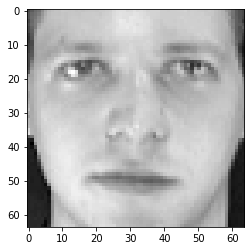

Nome dell'immagine:  image-152.png
Color moments dell'immagine:  [160.859375, 180.921875, 203.796875, 226.984375, 226.359375, 206.390625, 192.09375, 174.296875, 130.96875, 138.71875, 131.953125, 211.78125, 200.28125, 112.96875, 124.03125, 147.484375, 172.515625, 169.828125, 131.21875, 179.578125, 177.625, 130.640625, 157.90625, 180.625, 179.46875, 215.703125, 199.921875, 194.328125, 197.671875, 188.46875, 203.65625, 172.359375, 149.84375, 227.546875, 207.546875, 203.390625, 205.078125, 199.359375, 212.75, 142.28125, 97.46875, 208.671875, 185.203125, 162.203125, 149.0625, 176.46875, 205.28125, 98.859375, 94.859375, 177.65625, 192.5, 152.625, 140.140625, 180.015625, 179.296875, 90.46875, 90.09375, 160.328125, 200.34375, 202.265625, 184.265625, 189.65625, 141.640625, 103.0625, 27.087166695861253, 26.32685456875498, 11.584175207341048, 5.951607418116135, 4.135846299051138, 14.744296765508182, 17.674769049056906, 9.241008615642288, 50.09302869100151, 46.998161117617144, 43.24401320107068, 1

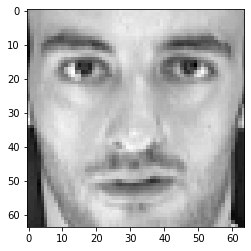

Nome dell'immagine:  image-151.png
Color moments dell'immagine:  [164.78125, 168.453125, 188.640625, 222.875, 221.96875, 189.53125, 177.40625, 174.734375, 136.546875, 141.828125, 127.609375, 205.953125, 196.34375, 110.28125, 125.25, 147.09375, 167.25, 157.359375, 120.375, 168.8125, 188.25, 130.765625, 148.0, 179.75, 177.59375, 205.84375, 198.671875, 188.484375, 212.4375, 190.046875, 205.421875, 187.328125, 183.84375, 222.875, 200.0625, 199.8125, 196.171875, 204.703125, 215.671875, 172.546875, 116.234375, 210.078125, 177.796875, 158.78125, 152.4375, 177.171875, 209.546875, 114.828125, 85.640625, 186.9375, 195.5, 159.546875, 141.4375, 181.203125, 186.15625, 91.703125, 89.71875, 158.90625, 200.609375, 205.9375, 189.5625, 196.734375, 146.234375, 96.9375, 11.265917558614566, 31.68888295182358, 28.56482057723057, 7.598313957714566, 7.409809271330808, 42.032713729159816, 39.11470261854869, 8.977823698390106, 39.23802750820147, 53.569334361968465, 47.4172361816816, 25.295398350972356, 20.63993

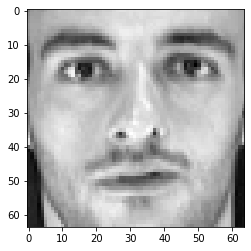

Nome dell'immagine:  image-2.png
Color moments dell'immagine:  [139.875, 192.546875, 198.96875, 212.5625, 208.40625, 195.109375, 191.84375, 127.46875, 154.625, 171.765625, 160.53125, 195.296875, 193.5, 154.015625, 163.125, 138.9375, 181.046875, 177.234375, 151.4375, 183.65625, 173.109375, 158.71875, 157.828125, 168.515625, 184.078125, 196.921875, 180.84375, 186.640625, 177.40625, 167.765625, 183.640625, 169.53125, 136.296875, 205.71875, 192.03125, 186.609375, 188.5625, 186.171875, 190.546875, 128.5625, 99.0625, 219.5, 193.625, 182.390625, 166.421875, 191.125, 197.84375, 80.53125, 78.125, 212.859375, 185.359375, 148.90625, 148.015625, 186.609375, 171.875, 31.71875, 88.390625, 194.84375, 204.46875, 178.8125, 172.140625, 181.71875, 123.34375, 23.984375, 47.9076259587135, 4.866754846340116, 3.311762889685794, 8.614803755745108, 8.997775332686407, 2.7620032783063455, 5.081273062678289, 42.67243282773435, 31.50967113443109, 19.53341862960437, 32.995250013259486, 8.00327996726186, 9.258442093

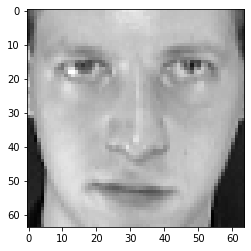

Nome dell'immagine:  image-159.png
Color moments dell'immagine:  [152.53125, 173.59375, 199.546875, 224.1875, 224.59375, 208.96875, 195.4375, 177.34375, 132.5625, 135.5, 123.671875, 208.390625, 201.71875, 118.03125, 119.828125, 144.375, 174.15625, 172.34375, 132.890625, 175.390625, 176.640625, 124.390625, 145.390625, 179.359375, 180.6875, 216.046875, 197.046875, 192.203125, 194.796875, 184.578125, 200.71875, 173.203125, 148.125, 223.296875, 203.78125, 202.671875, 200.125, 196.8125, 210.421875, 139.734375, 107.375, 202.75, 176.46875, 159.53125, 145.875, 176.265625, 200.3125, 90.453125, 106.34375, 176.8125, 189.109375, 147.671875, 139.15625, 181.765625, 170.359375, 78.890625, 112.5, 154.453125, 197.53125, 194.140625, 182.828125, 176.28125, 136.375, 91.625, 34.02617041980334, 30.16554260969791, 12.871880310753943, 7.152086671035244, 3.681536491398666, 10.879982694724289, 11.648330084179449, 9.713422977380322, 48.7621379120112, 49.580742229216376, 44.41707677216473, 22.285517429698036, 19.

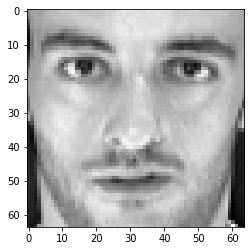

Nome dell'immagine:  image-231.png
Color moments dell'immagine:  [168.0, 159.90625, 165.609375, 173.09375, 179.390625, 173.8125, 168.015625, 110.046875, 167.078125, 133.90625, 123.15625, 192.328125, 177.546875, 111.453125, 146.3125, 137.25, 190.078125, 144.1875, 81.578125, 172.921875, 157.53125, 110.890625, 151.140625, 176.578125, 193.8125, 182.3125, 168.53125, 186.5625, 192.375, 179.125, 202.578125, 186.25, 198.78125, 210.9375, 194.46875, 191.359375, 197.171875, 206.25, 220.359375, 191.890625, 163.234375, 234.46875, 194.1875, 174.046875, 169.875, 193.9375, 223.609375, 167.34375, 96.015625, 234.296875, 191.984375, 157.0, 145.203125, 169.75, 214.84375, 138.609375, 32.90625, 196.921875, 205.953125, 201.375, 185.03125, 203.421875, 208.234375, 128.828125, 8.023403267940607, 13.982934632526177, 11.656030075003024, 12.876478980587045, 7.270697154288232, 16.305554076755563, 14.103957985593087, 56.63298224298607, 17.204927244379007, 32.54694626132381, 47.69375573319321, 16.721108186492156, 20.

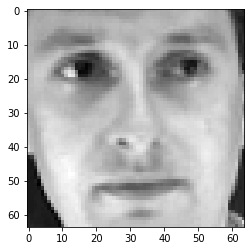

Nome dell'immagine:  image-6.png
Color moments dell'immagine:  [132.703125, 179.203125, 187.921875, 216.71875, 215.265625, 196.1875, 204.453125, 140.46875, 143.1875, 183.90625, 161.515625, 203.71875, 205.953125, 159.3125, 178.96875, 141.921875, 164.234375, 168.0, 159.21875, 183.71875, 202.453125, 166.078125, 155.578125, 164.203125, 186.34375, 193.375, 198.046875, 205.34375, 210.015625, 209.375, 207.171875, 190.4375, 200.078125, 210.6875, 198.734375, 187.515625, 174.328125, 217.171875, 212.78125, 190.15625, 204.0625, 219.6875, 199.59375, 161.4375, 183.453125, 219.875, 220.453125, 185.25, 153.015625, 225.734375, 193.546875, 185.78125, 177.984375, 200.328125, 214.03125, 135.59375, 79.375, 226.046875, 215.3125, 188.578125, 195.25, 208.25, 190.640625, 92.359375, 40.92778689636632, 13.653273059394037, 17.645205339818943, 11.964098312764737, 9.849242019535057, 25.075433072032872, 12.281756907477652, 42.59326852259051, 43.375855539113, 36.89288496360104, 31.73572129098967, 15.62996796021988, 1

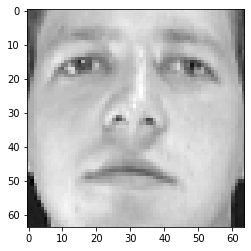

Nome dell'immagine:  image-230.png
Color moments dell'immagine:  [167.9375, 155.6875, 161.859375, 178.203125, 181.25, 173.984375, 171.34375, 138.171875, 175.828125, 130.125, 103.984375, 188.9375, 185.109375, 112.609375, 131.921875, 159.8125, 192.3125, 148.796875, 96.953125, 155.09375, 175.078125, 98.484375, 144.25, 189.421875, 194.59375, 187.265625, 174.046875, 184.828125, 196.171875, 178.515625, 199.75, 191.375, 199.25, 213.703125, 195.296875, 190.125, 198.671875, 206.703125, 222.140625, 192.15625, 172.859375, 235.578125, 192.015625, 170.28125, 166.75, 194.9375, 225.828125, 179.921875, 120.734375, 236.53125, 184.359375, 151.484375, 140.421875, 166.25, 220.171875, 146.21875, 54.78125, 227.484375, 205.375, 198.4375, 188.671875, 208.671875, 212.640625, 85.09375, 10.161008500636145, 19.861925731157086, 19.988955690815242, 10.867353184394764, 8.085480814398114, 17.30109478788481, 18.38326238559141, 46.106044440879714, 16.403653068276437, 45.091746750375506, 46.196080795446, 30.002018161283

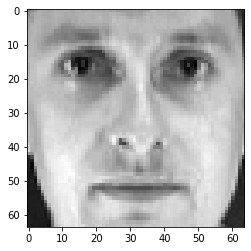

Nome dell'immagine:  image-178.png
Color moments dell'immagine:  [144.25, 204.8125, 241.90625, 250.65625, 251.84375, 247.109375, 223.0, 94.765625, 148.734375, 163.65625, 144.78125, 199.140625, 234.453125, 179.890625, 153.6875, 109.328125, 183.90625, 165.390625, 168.4375, 189.546875, 217.109375, 146.53125, 144.484375, 131.828125, 205.859375, 238.5625, 247.09375, 221.265625, 230.890625, 223.0625, 230.359375, 174.359375, 181.5625, 226.234375, 237.171875, 166.640625, 154.4375, 194.0, 218.453125, 170.578125, 157.75, 213.734375, 200.40625, 185.703125, 176.046875, 167.90625, 198.09375, 134.859375, 107.265625, 198.5625, 214.96875, 193.25, 178.109375, 183.59375, 186.078125, 96.0625, 84.859375, 117.15625, 207.546875, 226.78125, 222.71875, 211.8125, 136.984375, 64.640625, 20.48780124854788, 14.22571944577848, 6.793192249414115, 1.5733994843967631, 1.7696993918459711, 3.4960566513394773, 16.539724907023093, 49.302555140270115, 20.805079148116093, 32.23847601760201, 50.08881759871658, 45.4081721676

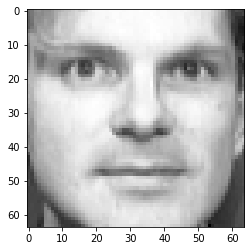

Nome dell'immagine:  image-176.png
Color moments dell'immagine:  [147.046875, 205.28125, 236.546875, 247.40625, 249.1875, 244.59375, 222.5, 93.578125, 138.125, 144.640625, 118.515625, 179.125, 230.390625, 164.890625, 130.953125, 102.765625, 187.0625, 160.5, 166.53125, 184.828125, 217.234375, 136.03125, 124.828125, 116.65625, 213.40625, 237.640625, 243.40625, 216.9375, 230.171875, 213.078125, 223.078125, 166.328125, 181.8125, 224.046875, 240.546875, 159.484375, 152.515625, 190.09375, 215.203125, 156.28125, 161.671875, 208.875, 223.546875, 205.890625, 183.5, 188.140625, 192.5, 141.59375, 130.671875, 198.125, 177.765625, 145.484375, 133.34375, 137.484375, 168.296875, 84.59375, 85.15625, 171.90625, 216.953125, 188.453125, 166.125, 183.0625, 154.34375, 50.75, 20.39257653496426, 11.55079644169613, 8.985978117844212, 2.9193254250768277, 2.6450129961873534, 4.163527463281587, 12.341495047197483, 57.79213957351272, 20.418664868203308, 34.81844302391155, 41.05103233609814, 48.42858788979914, 17.

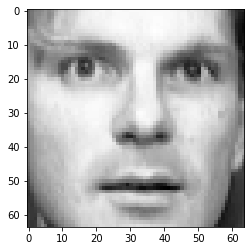

Nome dell'immagine:  image-175.png
Color moments dell'immagine:  [117.109375, 203.296875, 242.9375, 251.609375, 252.21875, 243.875, 219.21875, 114.28125, 130.59375, 150.6875, 147.46875, 221.953125, 214.40625, 144.0625, 149.953125, 135.875, 134.78125, 150.703125, 163.203125, 206.453125, 195.96875, 165.125, 163.921875, 165.46875, 177.375, 233.046875, 234.421875, 221.0625, 212.640625, 236.265625, 232.671875, 185.65625, 163.140625, 211.53125, 223.96875, 141.5625, 152.359375, 221.84375, 206.375, 154.453125, 114.65625, 185.03125, 186.671875, 181.09375, 165.453125, 185.421875, 185.78125, 133.859375, 71.359375, 159.140625, 185.265625, 142.359375, 144.1875, 179.65625, 173.90625, 99.578125, 59.546875, 99.109375, 195.015625, 210.765625, 209.734375, 205.046875, 144.03125, 67.796875, 27.77314192001645, 22.06218462062121, 6.843964037748884, 1.9253018229293297, 1.8154609435347266, 5.599944196150529, 17.359677371353996, 47.99624619110853, 33.204253657287644, 35.941304146483056, 59.11164456718744, 34.1

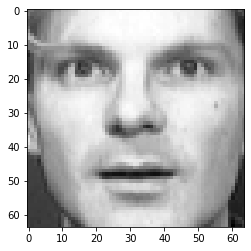

In [16]:
kSimilarImagesOfColorMoments = getKsimilarImages('image-0.png', 10, 'ColorMoments', 'Minkowski')

for i in range(0, len(kSimilarImagesOfColorMoments)):
    imageName = kSimilarImagesOfColorMoments[i][0]
    print("Nome dell'immagine: ", kSimilarImagesOfColorMoments[i][0])
    print("Color moments dell'immagine: ", dictionaryOfColorMomentsDescriptors[imageName])
    print("Distanza dall'immagine in input: ", kSimilarImagesOfColorMoments[i][1])

    # load the image
    image = Image.open('./olivetti_PNG_master/images/' + imageName)
    # convert image to numpy array
    # data = asarray(image)

    # display the array of pixels as an image
    # il parametro cmap serve a specificare il tipo di colormap che vogliamo utilizzare, per questo motivo abbiamo specificato gray per la scala di grigi
    pyplot.imshow(image, cmap='gray')
    pyplot.show()

In [17]:
inputImage = 'image-0.png'

### Recupero delle K immagini più simili a quella in input usando i Color Moments e le diverse metriche di distanza definite

> **Nota bene:** L'algoritmo itera richiamando la procedura per ottenere le K immagini più simili tante volte quante sono le distanze elencate nell'array *distanceMetrics*

colorMomentsOfInputImages
[147.078125, 196.09375, 203.921875, 223.53125, 214.203125, 203.359375, 202.6875, 133.71875, 148.6875, 179.3125, 166.984375, 208.671875, 202.453125, 157.171875, 175.390625, 136.015625, 183.5625, 174.703125, 148.109375, 185.375, 185.515625, 154.15625, 155.46875, 170.671875, 192.109375, 198.28125, 195.765625, 191.921875, 199.015625, 182.625, 190.484375, 184.828125, 186.15625, 218.015625, 205.125, 196.890625, 190.4375, 201.078125, 207.921875, 173.515625, 125.484375, 230.328125, 209.84375, 187.390625, 184.75, 209.953125, 212.78125, 115.859375, 63.296875, 227.015625, 197.640625, 160.28125, 148.78125, 190.390625, 195.421875, 75.484375, 49.40625, 199.484375, 219.984375, 201.15625, 191.578125, 191.671875, 165.578125, 76.421875, 41.50425606470227, 4.512893854003216, 3.6967244263503063, 6.454089667606114, 8.637092406265838, 4.388789651985499, 5.237708826385827, 42.89211347599346, 41.92175561388144, 21.999911221411782, 29.592805390151423, 8.538615753409625, 8.576730305563

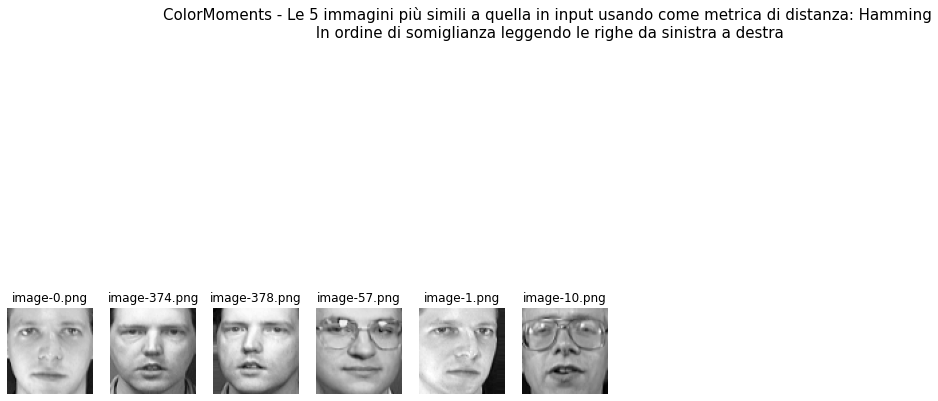

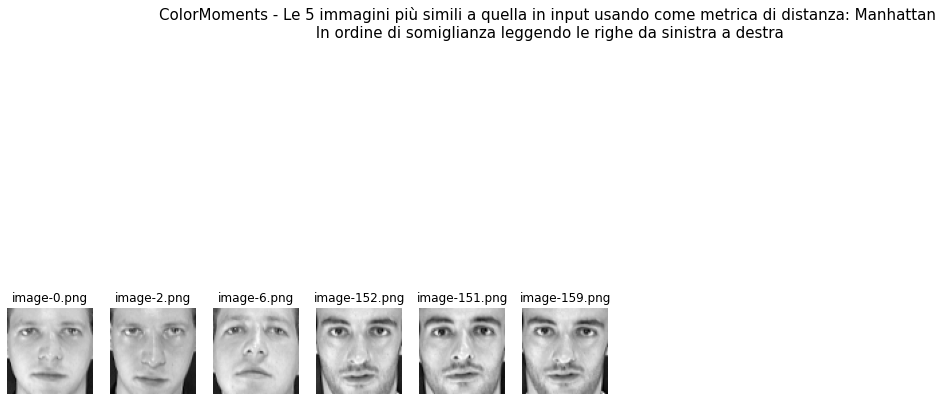

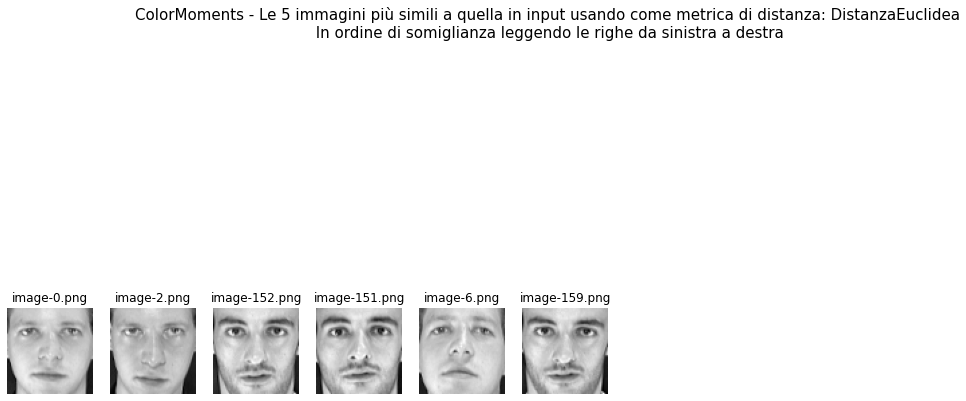

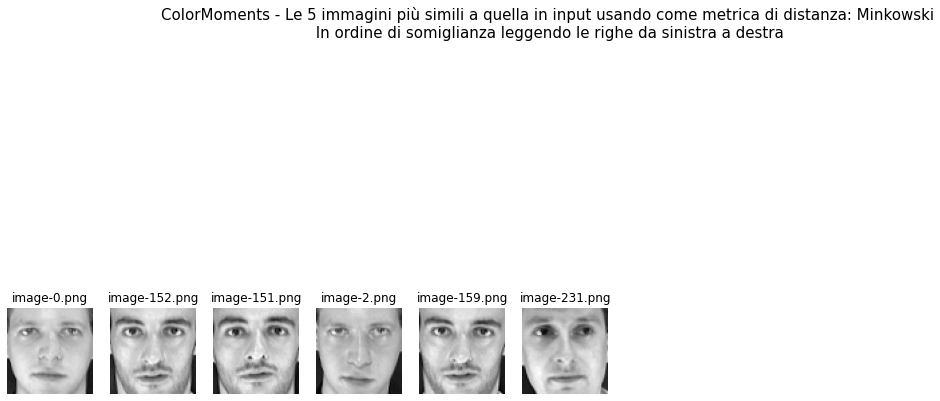

In [18]:
distanceMetrics = ['Hamming', 'Manhattan', 'DistanzaEuclidea', 'Minkowski']

import math
# numero di immagini simili che vogliamo ottenere
k = 5

w = 10
h = 10
columns = 11    # le colonne sono 11 per riga
rows = math.trunc(k / 10) + 1

for i in range(len(distanceMetrics)):
    fig = plt.figure(figsize=(20, 10))
    fig.suptitle('ColorMoments - ' + 'Le ' + str(k) + ' immagini più simili a quella in input usando come metrica di distanza: ' + distanceMetrics[i] + '\n In ordine di somiglianza leggendo le righe da sinistra a destra', fontsize=15)
    # plt.axis('off')
    currentIndex = 1

    kSimilarImagesOfColMom = getKsimilarImages(inputImage, k, 'ColorMoments', distanceMetrics[i])
    #print(kSimilarImagesOfColMom)

    for j in range(len(kSimilarImagesOfColMom)):
        imageName = kSimilarImagesOfColMom[j][0]
        # load the image
        image = Image.open('./olivetti_PNG_master/images/' + imageName)
        
        fig.add_subplot(rows, columns, currentIndex)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(imageName)

        currentIndex += 1

plt.show()



### Recupero delle K immagini più simili a quella in input usando le HOG features e le diverse metriche di distanza definite

> **Nota bene:** L'algoritmo itera richiamando la procedura per ottenere le K immagini più simili tante volte quante sono le distanze elencate nell'array *distanceMetrics*

2
[0.54746698 0.         0.         ... 0.00242788 0.01360166 0.15256751]
[('image-0.png', 0.0), ('image-394.png', 0.9716931216931217), ('image-71.png', 0.9716931216931217), ('image-7.png', 0.9735449735449735), ('image-70.png', 0.9735449735449735), ('image-340.png', 0.9751322751322752), ('image-391.png', 0.9761904761904762), ('image-53.png', 0.9761904761904762), ('image-198.png', 0.9764550264550265), ('image-28.png', 0.9764550264550265), ('image-197.png', 0.9767195767195768), ('image-74.png', 0.9767195767195768), ('image-55.png', 0.976984126984127), ('image-59.png', 0.976984126984127), ('image-229.png', 0.9775132275132276)]
[0.54746698 0.         0.         ... 0.00242788 0.01360166 0.15256751]
[('image-0.png', 0.0), ('image-7.png', 233.6401485828386), ('image-2.png', 240.943374715284), ('image-159.png', 265.67054347873307), ('image-6.png', 266.90467958013284), ('image-152.png', 269.6770558306073), ('image-151.png', 280.2559802316425), ('image-235.png', 286.3546050034106), ('image-178.

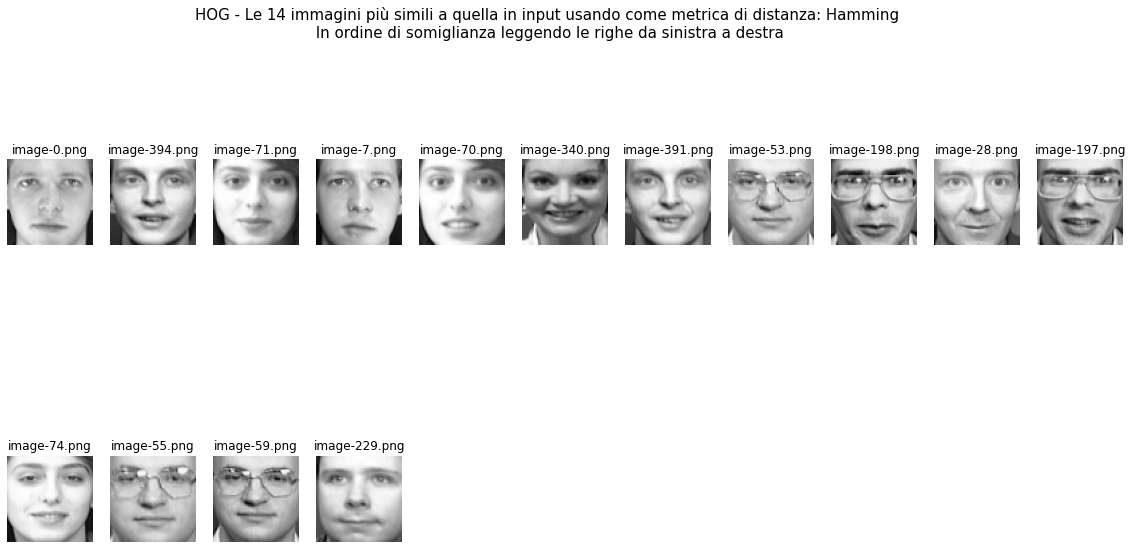

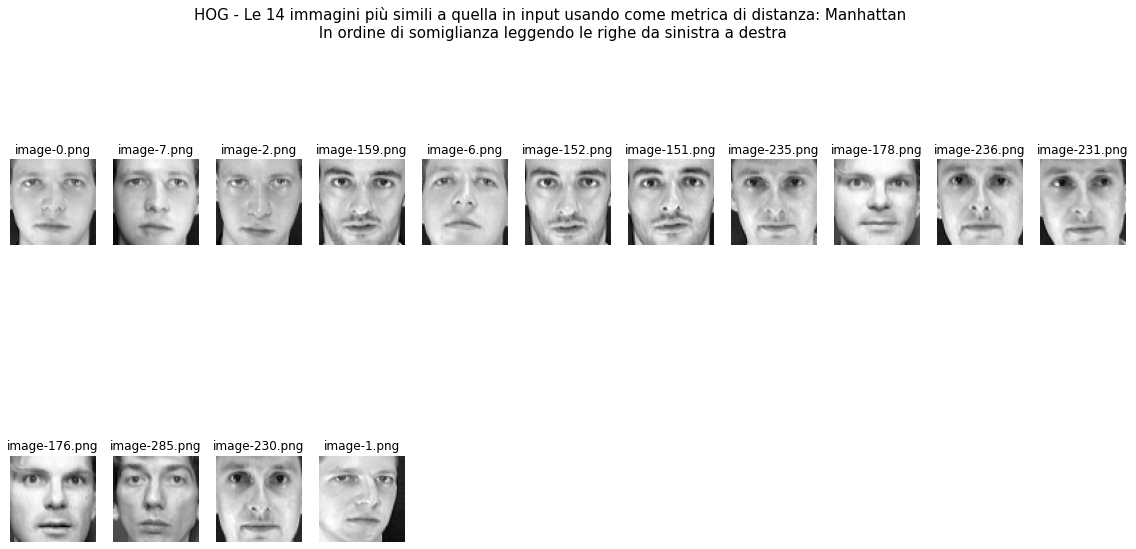

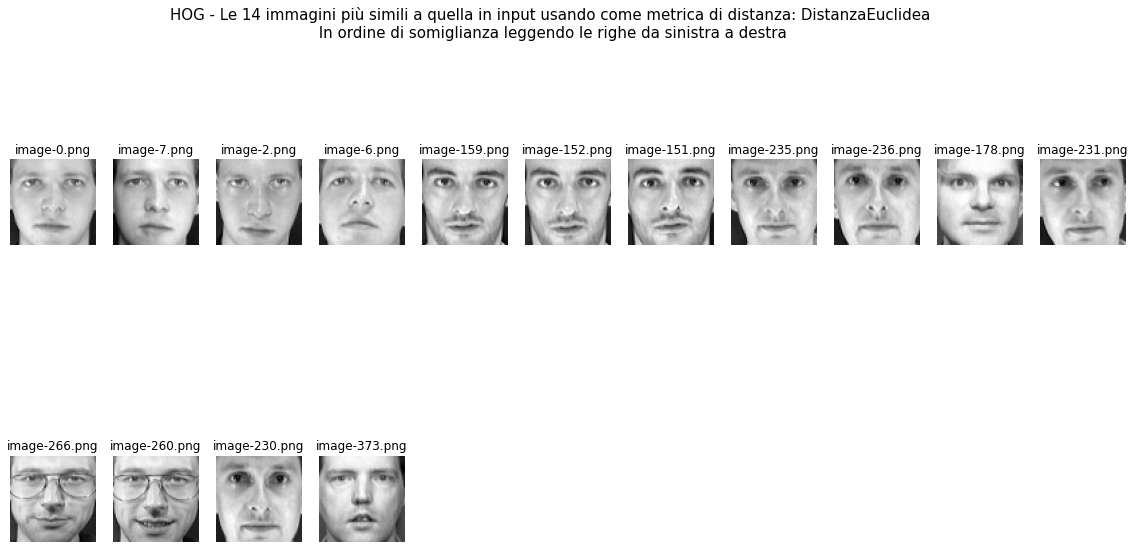

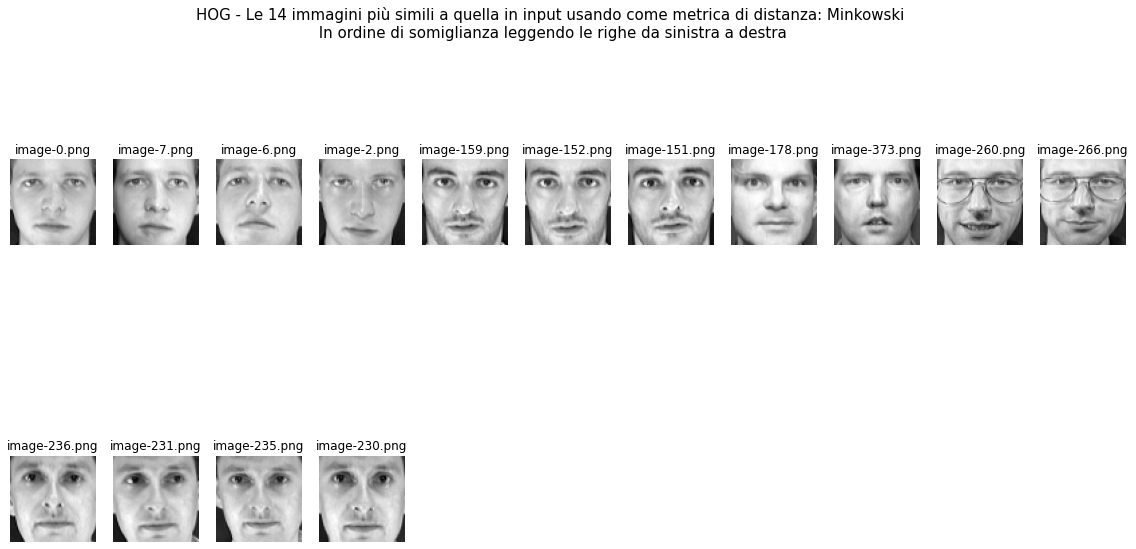

In [19]:
import math
# numero di immagini simili che vogliamo ottenere
k = 14

w = 10
h = 10
columns = 11    # le colonne sono 11 per riga
rows = math.trunc(k / 10) + 1

print(rows)


for i in range(len(distanceMetrics)):
    fig = plt.figure(figsize=(20, 10))
    fig.suptitle('HOG - ' + 'Le ' + str(k) + ' immagini più simili a quella in input usando come metrica di distanza: ' + distanceMetrics[i] + '\n In ordine di somiglianza leggendo le righe da sinistra a destra', fontsize=15)
    # plt.axis('off')
    currentIndex = 1

    kSimilarImagesOfColMom = getKsimilarImages(inputImage, k, 'HOG', distanceMetrics[i])
    #print(kSimilarImagesOfColMom)

    for j in range(len(kSimilarImagesOfColMom)):
        imageName = kSimilarImagesOfColMom[j][0]
        # load the image
        image = Image.open('./olivetti_PNG_master/images/' + imageName)
        
        fig.add_subplot(rows, columns, currentIndex)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(imageName)

        currentIndex += 1

plt.show()


### Test recupero K immagini più simili a quella in input usando le LBP features e la distanza passata in input

2
[0.03222656 0.01098633 0.00146484 0.0065918  0.01367188 0.00244141
 0.0078125  0.02148438 0.00097656 0.         0.         0.00073242
 0.00830078 0.00048828 0.01000977 0.02880859 0.01147461 0.00219727
 0.00024414 0.00146484 0.00146484 0.00024414 0.00048828 0.00048828
 0.00854492 0.00073242 0.00048828 0.00073242 0.02441406 0.00170898
 0.02514648 0.0234375  0.00097656 0.         0.         0.
 0.         0.         0.00024414 0.00024414 0.         0.
 0.         0.         0.00048828 0.         0.         0.
 0.00732422 0.00097656 0.00024414 0.00024414 0.00170898 0.00024414
 0.00048828 0.         0.01293945 0.00024414 0.00024414 0.00024414
 0.04833984 0.00048828 0.01342773 0.00756836 0.01904297 0.0012207
 0.         0.00146484 0.00390625 0.00073242 0.00170898 0.0012207
 0.00024414 0.         0.         0.         0.00024414 0.
 0.00048828 0.00048828 0.00097656 0.00024414 0.00024414 0.
 0.00048828 0.         0.         0.         0.00195312 0.00024414
 0.         0.00024414 0.00097656 0

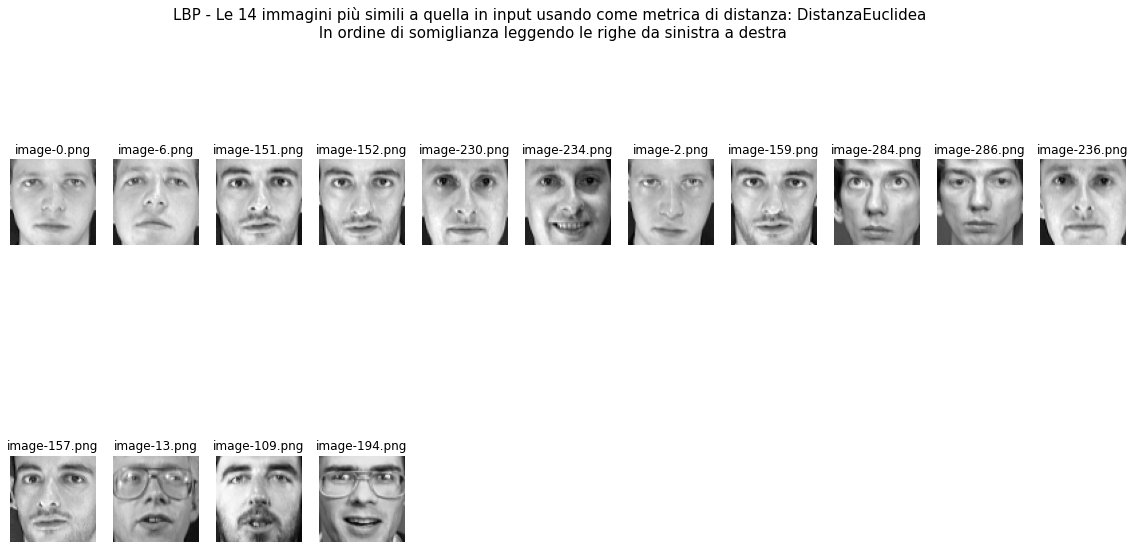

In [20]:
import math
# numero di immagini simili che vogliamo ottenere
k = 14

w = 10
h = 10
columns = 11    # le colonne sono 11 per riga
rows = math.trunc(k / 10) + 1

print(rows)

distanceMetrics = ['DistanzaEuclidea']

for i in range(len(distanceMetrics)):
    fig = plt.figure(figsize=(20, 10))
    fig.suptitle('LBP - ' + 'Le ' + str(k) + ' immagini più simili a quella in input usando come metrica di distanza: ' + distanceMetrics[i] + '\n In ordine di somiglianza leggendo le righe da sinistra a destra', fontsize=15)
    # plt.axis('off')
    currentIndex = 1

    kSimilarImagesOfColMom = getKsimilarImages(inputImage, k, 'LBP', distanceMetrics[i])
    print(kSimilarImagesOfColMom)

    for j in range(len(kSimilarImagesOfColMom)):
        imageName = kSimilarImagesOfColMom[j][0]
        # load the image
        image = Image.open('./olivetti_PNG_master/images/' + imageName)
        
        fig.add_subplot(rows, columns, currentIndex)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(imageName)

        currentIndex += 1

plt.show()
